**Attribute Information:**
1. id
2. model_f5
3. title_f1	
4. price_f9	
5. city_f4	
6. model_spec_f6	
7. body_f7	
8. engine_f8	
9. csv_transmission_f9	
10. drive_f10	
11. steer_f11	
12. paint_f12	
13. customs_f13	
14. run_f15	
15. vin_f18	description_f7	
16. visits_f8	
17. pict_f10	
18. av_prise_f17


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
import random
import glob
random.seed(42)

tqdm.pandas()

In [2]:
# Connect to the Google Drive
# from google.colab import drive
# drive.mount('/content/drive')
# KZ dataset
# root = "/content/drive/My Drive/Car_price_prediction"
root = r"C:/Users/NBD/PycharmProjects/pricing_cars"

# df_name = 'kolesa_avto_legkovi_1k.csv'
cleaned_df_files = sorted(glob.glob(root + "/datasets/cleaned/*.csv"))

print(cleaned_df_files)


['C:/Users/NBD/PycharmProjects/pricing_cars/datasets/cleaned\\clnd_kolesa_avto_legkovi_1k+_2110.csv', 'C:/Users/NBD/PycharmProjects/pricing_cars/datasets/cleaned\\clnd_kolesa_avto_legkovi_1k.csv', 'C:/Users/NBD/PycharmProjects/pricing_cars/datasets/cleaned\\clnd_kolesa_avto_legkovi_unique_1.csv', 'C:/Users/NBD/PycharmProjects/pricing_cars/datasets/cleaned\\clnd_kolesa_avto_legkovi_unique_2.csv', 'C:/Users/NBD/PycharmProjects/pricing_cars/datasets/cleaned\\clnd_kolesa_unique_saved_0.csv']


In [3]:

# Load the cleaned datasets
df_new = pd.DataFrame()
for cleaned_df_name in cleaned_df_files:
    df = pd.read_csv(cleaned_df_name)
    df_new = pd.concat([df_new, df])
print('Joint dataset shape: ', df_new.shape)    

Joint dataset shape:  (160458, 19)


In [4]:
# Drop duplicated IDs
len_dp = sum(df_new.duplicated(['id']))
df_duplicated_id = df_new.duplicated(['id'], keep='last').sort_values()
print(df_duplicated_id.head())
if len_dp > 0:
    print("Number of duplicated ID = ", len_dp, ' from ', df.shape[0])
    df_new = df_new[~df_new.duplicated(['id'], keep='last')]
print('Joint dataset new shape: ', df_new.shape)

47466    False
74205    False
74206    False
74207    False
74208    False
dtype: bool
Number of duplicated ID =  19758  from  19103
Joint dataset new shape:  (140700, 19)


In [5]:
print(df_new.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140700 entries, 0 to 19102
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   140700 non-null  object 
 1   model_f5             140700 non-null  object 
 2   city_f4              140700 non-null  object 
 3   body_f7              140663 non-null  object 
 4   csv_transmission_f9  140700 non-null  object 
 5   drive_f10            140662 non-null  object 
 6   paint_f12            116563 non-null  object 
 7   year_f1              140700 non-null  int64  
 8   price_f9             140700 non-null  float64
 9   run_f15              88192 non-null   float64
 10  steer_left_f11       140700 non-null  int64  
 11  steer_right_f21      140700 non-null  int64  
 12  cleared_f13          140700 non-null  int64  
 13  not_cleared_f23      140700 non-null  int64  
 14  engine_volume_f8     140033 non-null  float64
 15  engine_type_f28   

In [6]:
print(df_new.columns)

Index(['id', 'model_f5', 'city_f4', 'body_f7', 'csv_transmission_f9',
       'drive_f10', 'paint_f12', 'year_f1', 'price_f9', 'run_f15',
       'steer_left_f11', 'steer_right_f21', 'cleared_f13', 'not_cleared_f23',
       'engine_volume_f8', 'engine_type_f28', 'options_f7', 'visits_f8',
       'av_prise_f17'],
      dtype='object')


In [7]:
# Save Joint cleaned dataset

# joint_df_name = 'joint_KZ.csv'
# df_new.to_csv(root + '/datasets/' + joint_df_name, index=False)

In [8]:
# Load Joint cleaned dataset

joint_df_name = 'joint_KZ.csv'
df_new = pd.read_csv(root + '/datasets/' + joint_df_name)

In [9]:
# print(df_new['model_f5'].value_counts())
# df_model = df_new[['city_f4', 'year_f1', 'price_f9']].loc[df_new.model_f5 == 'Toyota Land Cruiser'].sort_values(['city_f4', 'year_f1'])#.groupby(['model_f5'])
print(df_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   140700 non-null  object 
 1   model_f5             140700 non-null  object 
 2   city_f4              140700 non-null  object 
 3   body_f7              140663 non-null  object 
 4   csv_transmission_f9  140700 non-null  object 
 5   drive_f10            140662 non-null  object 
 6   paint_f12            116563 non-null  object 
 7   year_f1              140700 non-null  int64  
 8   price_f9             140700 non-null  float64
 9   run_f15              88192 non-null   float64
 10  steer_left_f11       140700 non-null  int64  
 11  steer_right_f21      140700 non-null  int64  
 12  cleared_f13          140700 non-null  int64  
 13  not_cleared_f23      140700 non-null  int64  
 14  engine_volume_f8     140033 non-null  float64
 15  engine_type_f28  

**Categorical features processing**

In [10]:

categorical = df_new.dtypes[df_new.dtypes == "object"].index[1:]
print('Categorical features (without "id"): ', categorical)

Categorical features (without "id"):  Index(['model_f5', 'city_f4', 'body_f7', 'csv_transmission_f9', 'drive_f10',
       'paint_f12', 'engine_type_f28'],
      dtype='object')


In [11]:
#Lets use One-Hot Encoding to convert categorical columns.
df_num = df_new
for ctgr in categorical:
    dummies = pd.get_dummies(df_new[ctgr])
    df_num = pd.concat([df_num,dummies],axis=1)
    #Let's drop the old columns.
    df_num = df_num.drop([ctgr],axis=1)

# df_num = df_num.drop(['id'],axis=1)
# df_num['av_prise_f17'] = df_new['av_prise_f17']
print(df_num.info())
# print(df_num.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Columns: 2069 entries, id to дизель
dtypes: float64(4), int64(7), object(1), uint8(2057)
memory usage: 288.9+ MB
None


In [12]:
clmn_list = df_num.columns.to_list()
print('New features names: ', clmn_list)

New features names:  ['id', 'year_f1', 'price_f9', 'run_f15', 'steer_left_f11', 'steer_right_f21', 'cleared_f13', 'not_cleared_f23', 'engine_volume_f8', 'options_f7', 'visits_f8', 'av_prise_f17', 'Acura MDX', 'Acura RDX', 'Acura TL', 'Acura TLX', 'Alfa Romeo 145', 'Alfa Romeo 155', 'Alfa Romeo 156', 'Alfa Romeo 164', 'Alfa Romeo Giulia', 'Alpina B4', 'Aro 24', 'Audi 100', 'Audi 200', 'Audi 80', 'Audi 90', 'Audi A3', 'Audi A4', 'Audi A4 allroad', 'Audi A5', 'Audi A6', 'Audi A6 allroad', 'Audi A7', 'Audi A8', 'Audi Cabriolet', 'Audi Coupe', 'Audi Q2L e-tron', 'Audi Q3', 'Audi Q3 Sportback', 'Audi Q5', 'Audi Q5 Sportback', 'Audi Q5 e-tron', 'Audi Q7', 'Audi Q8', 'Audi Quattro', 'Audi R8', 'Audi RS 6', 'Audi RS 7', 'Audi RS Q8', 'Audi S2', 'Audi S4', 'Audi S5', 'Audi S6', 'Audi S7', 'Audi S8', 'Audi SQ8', 'Audi TT', 'Audi V8', 'Audi e-tron', 'Audi e-tron GT', 'Audi e-tron Sportback', 'Avatr 11', 'BAIC BJ40 Plus', 'BAIC BJ80', 'BAIC Beijing X7', 'BAIC EC3', 'BAIC EU5', 'BMW', 'BMW 116', 'BM

**Null values processing**

In [13]:
# Check if there are any null values.
num_list =[[clmn, df_num[clmn].isnull().sum()] for clmn in clmn_list if df_num[clmn].isnull().sum() > 0]
print('Features with null values: ', num_list)

Features with null values:  [['run_f15', 52508], ['engine_volume_f8', 667], ['av_prise_f17', 21109]]


count    1.407000e+05
mean     1.696392e+05
std      1.120834e+05
min      1.000000e+00
25%      1.170000e+05
50%      1.696392e+05
75%      1.900000e+05
max      4.040000e+06
Name: run_f15, dtype: float64


array([[<AxesSubplot: title={'center': 'run_f15'}>]], dtype=object)

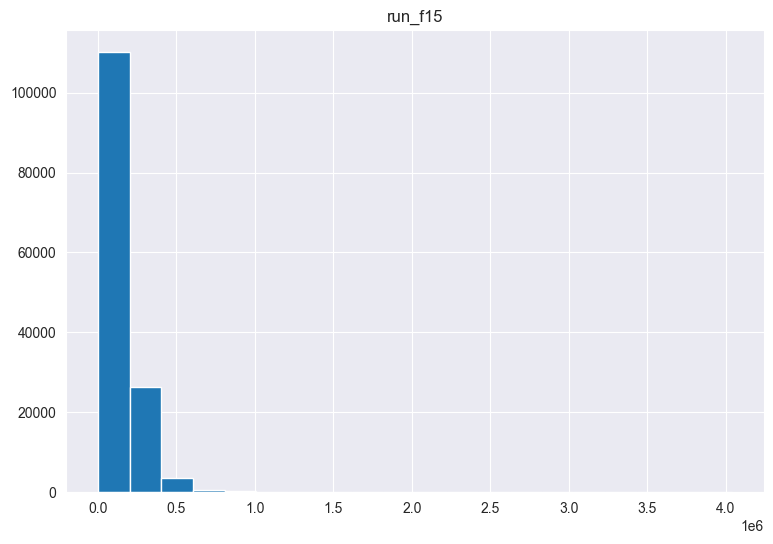

In [14]:
new_run = np.where(df_num["run_f15"].isnull(), # Logical check
                       df_num["run_f15"].mean(),                       # Value if check is true
                       df_num["run_f15"])     # Value if check is false
df_num["run_f15"] = new_run 
print(df_num["run_f15"].describe())
df_num.hist(column='run_f15',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20)         # Number of histogram bins

count    140700.000000
mean          2.254520
std           0.866949
min           0.100000
25%           1.600000
50%           2.000000
75%           2.500000
max           9.000000
Name: engine_volume_f8, dtype: float64


array([[<AxesSubplot: title={'center': 'engine_volume_f8'}>]],
      dtype=object)

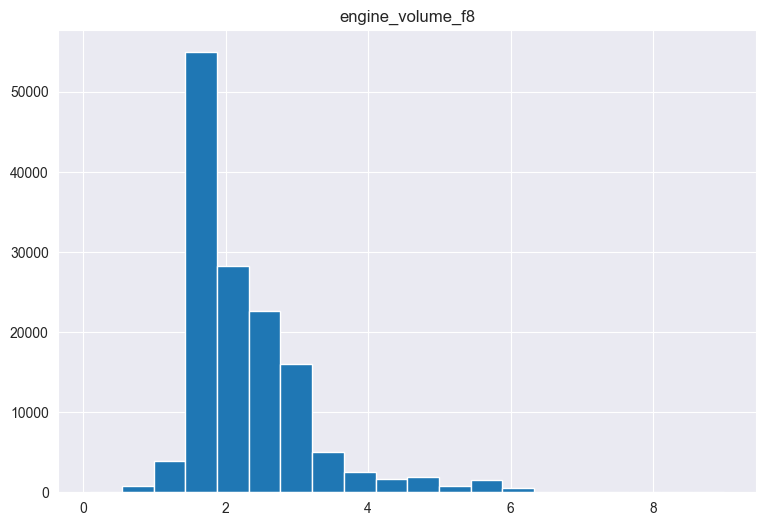

In [15]:
new_engine_volume = np.where(df_num["engine_volume_f8"].isnull(), # Logical check
                       df_num["engine_volume_f8"].mean(),                       # Value if check is true
                       df_num["engine_volume_f8"])     # Value if check is false
df_num["engine_volume_f8"] = new_engine_volume 
print(df_num["engine_volume_f8"].describe())
df_num.hist(column='engine_volume_f8',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20)         # Number of histogram bins

count    1.407000e+05
mean     5.793125e+06
std      1.036697e+07
min      0.000000e+00
25%      9.710290e+05
50%      2.497024e+06
75%      6.356250e+06
max      1.687500e+08
Name: av_prise_f17, dtype: float64


array([[<AxesSubplot: title={'center': 'av_prise_f17'}>]], dtype=object)

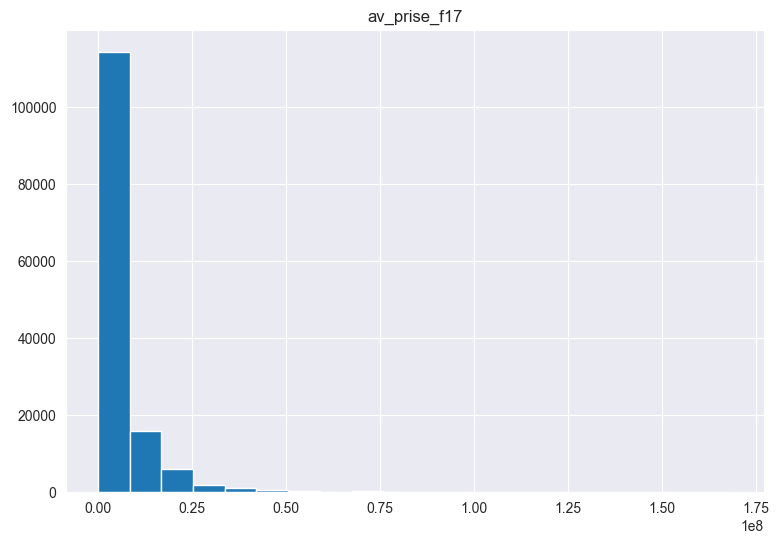

In [16]:
new_av_prise = np.where(df_num["av_prise_f17"].isnull(), # Logical check
                       0.0, #df_num["price_f9"].mean(),             # Value if check is true
                       df_num["av_prise_f17"])     # Value if check is false
df_num["av_prise_f17"] = new_av_prise 
print(df_num["av_prise_f17"].describe())
df_num.hist(column='av_prise_f17',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20)         # Number of histogram bins

array([[<AxesSubplot: title={'center': 'price_f9'}>]], dtype=object)

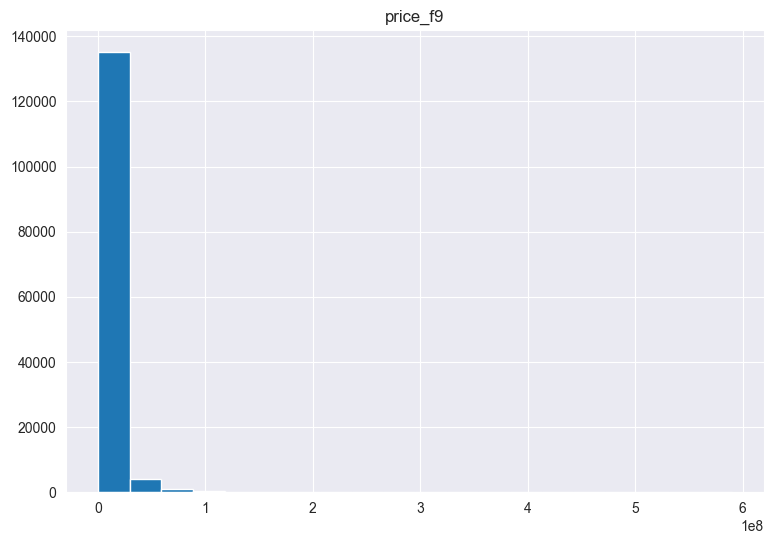

In [17]:
df_num.hist(column='price_f9',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20)         # Number of histogram bins

**1.Data Visualization** 


**1.1 Visualizing Numerical Continuous Features**


<AxesSubplot: ylabel='av_prise_f17'>

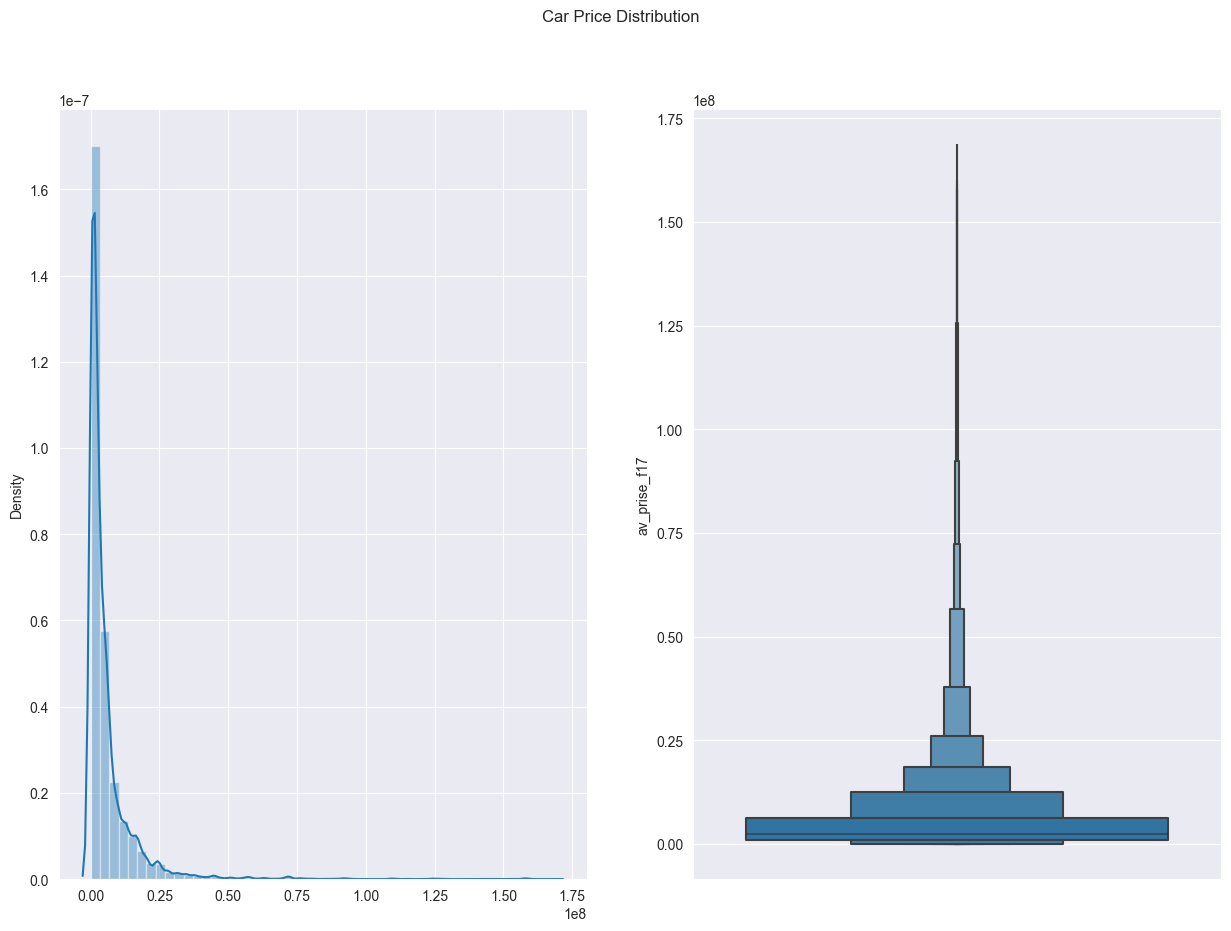

In [18]:
plt.figure(figsize=(15,10))
plt.suptitle('Car Price Distribution')

plt.subplot(1,2,1)
sns.distplot(x=df_num.av_prise_f17)

plt.subplot(1,2,2)
sns.boxenplot(y=df_num.av_prise_f17)

In [19]:
print(df_num.price_f9.describe())

count    1.407000e+05
mean     7.719393e+06
std      1.313116e+07
min      1.000000e+04
25%      1.650000e+06
50%      3.700000e+06
75%      8.500000e+06
max      5.900000e+08
Name: price_f9, dtype: float64


1.   (75%) of our data are below 13,2M and (25%) is between 13,2M and 250M.
2.   Also (25%) of our data is between the min 10K and 2,2M.
3.   These insights show that our data has a high variance and a lot of outliers.






<AxesSubplot: xlabel='options_f7', ylabel='price_f9'>

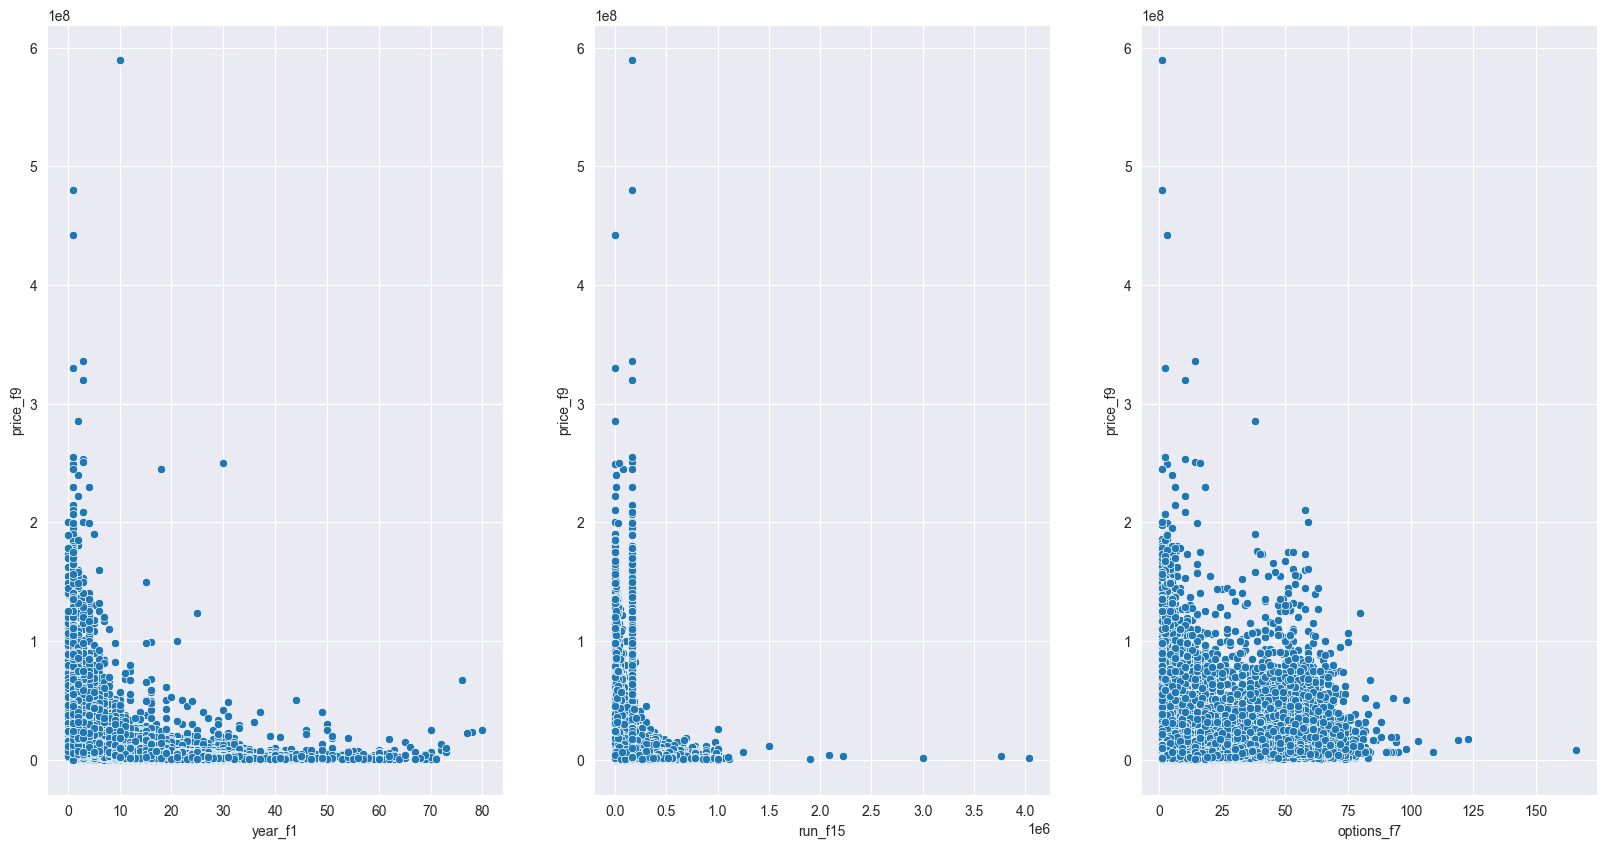

In [20]:
# Year, Mileage and Options vs Price
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.scatterplot(x=df_num.year_f1,y=df_num.price_f9)

plt.subplot(1,3,2)
sns.scatterplot(x=df_num.run_f15,y=df_num.price_f9)

plt.subplot(1,3,3)
sns.scatterplot(x=df_num.options_f7,y=df_num.price_f9)

1.   Mileage seem to have a negative and year of issue a positive  correlation with price.
2.   Options doesn't show any trend.

Text(0.5, 1.0, 'Spread Plot')

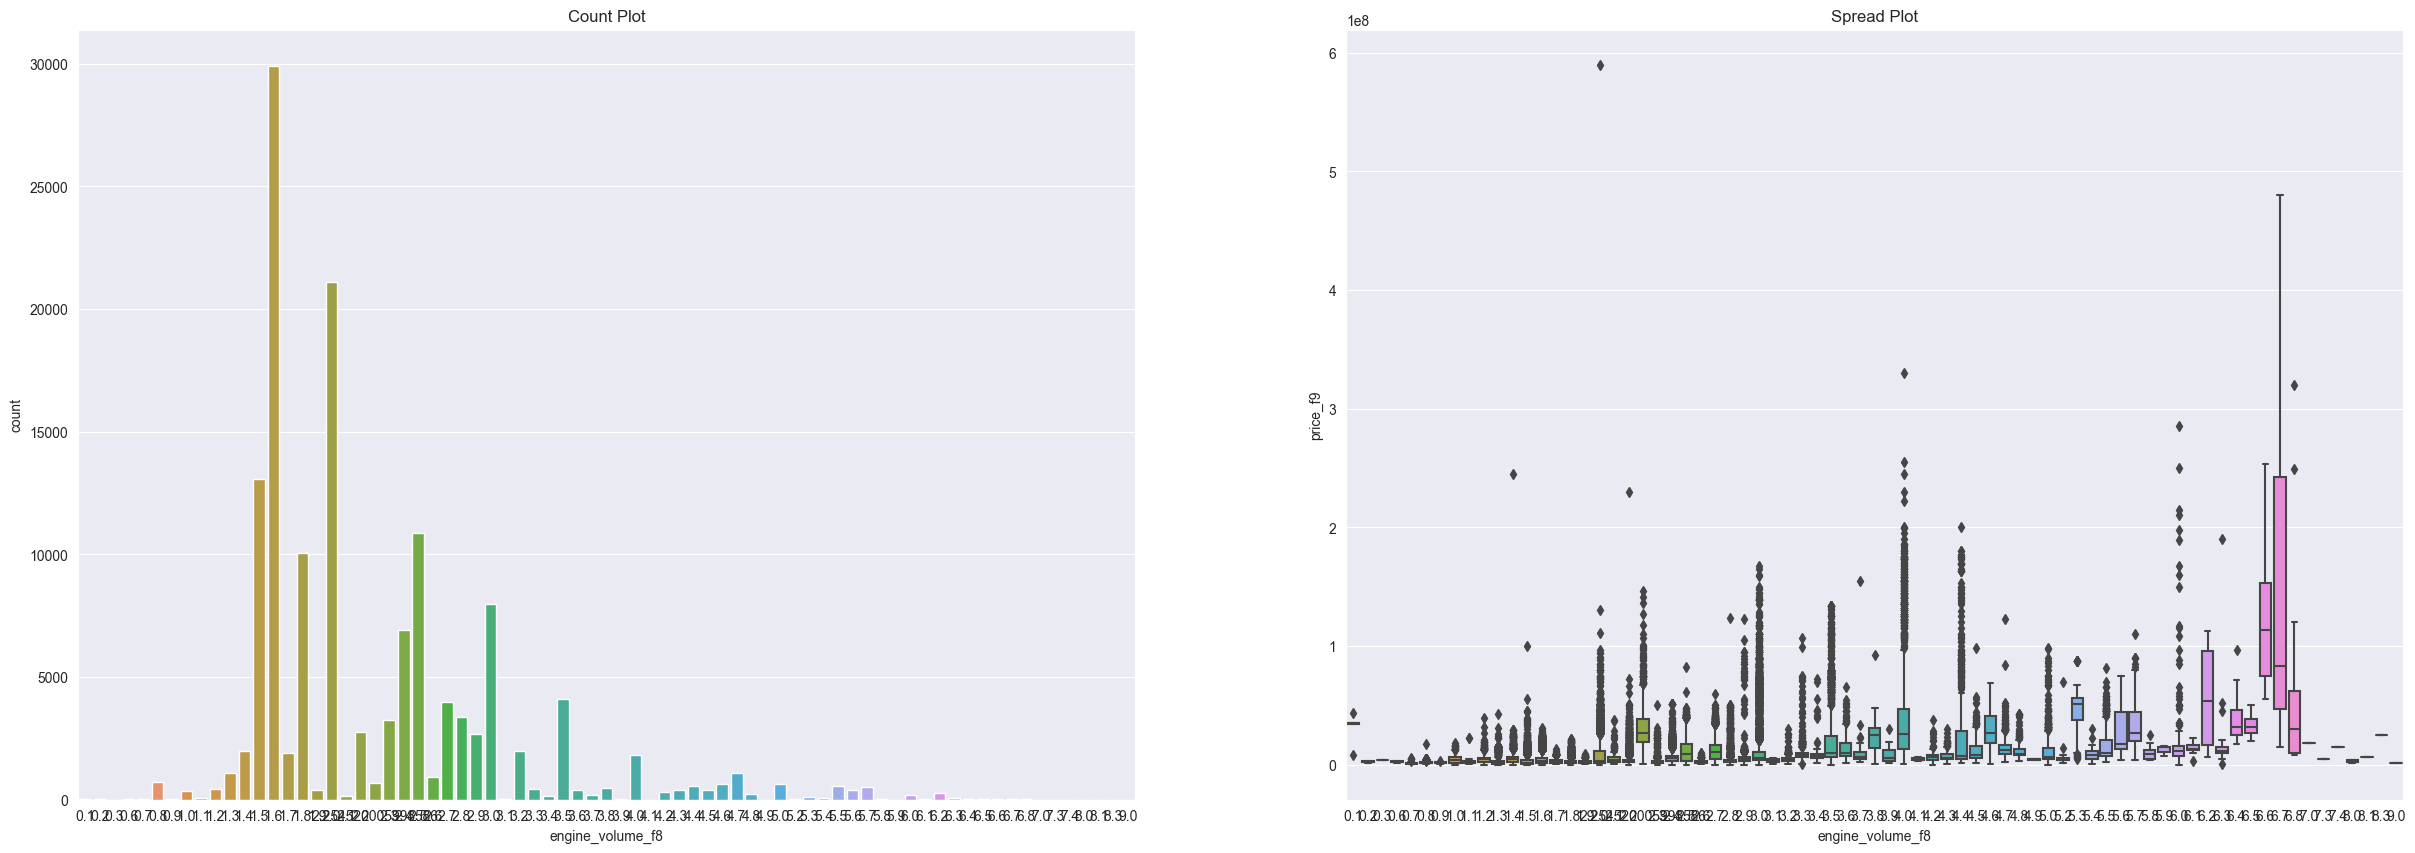

In [21]:
# Engine Volume vs Price
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
sns.countplot(x=df_num.engine_volume_f8)
plt.title('Count Plot')
plt.subplot(1,2,2)
sns.boxplot(x=df_num.engine_volume_f8,y=df_num.price_f9)
plt.title('Spread Plot')



1.   The most sold cars are with engine size:1, 1.5, 2  ????
2.   Cars with greater engine size cost more.  ????





**1.2 Visualizing Numerical Discrete Features**

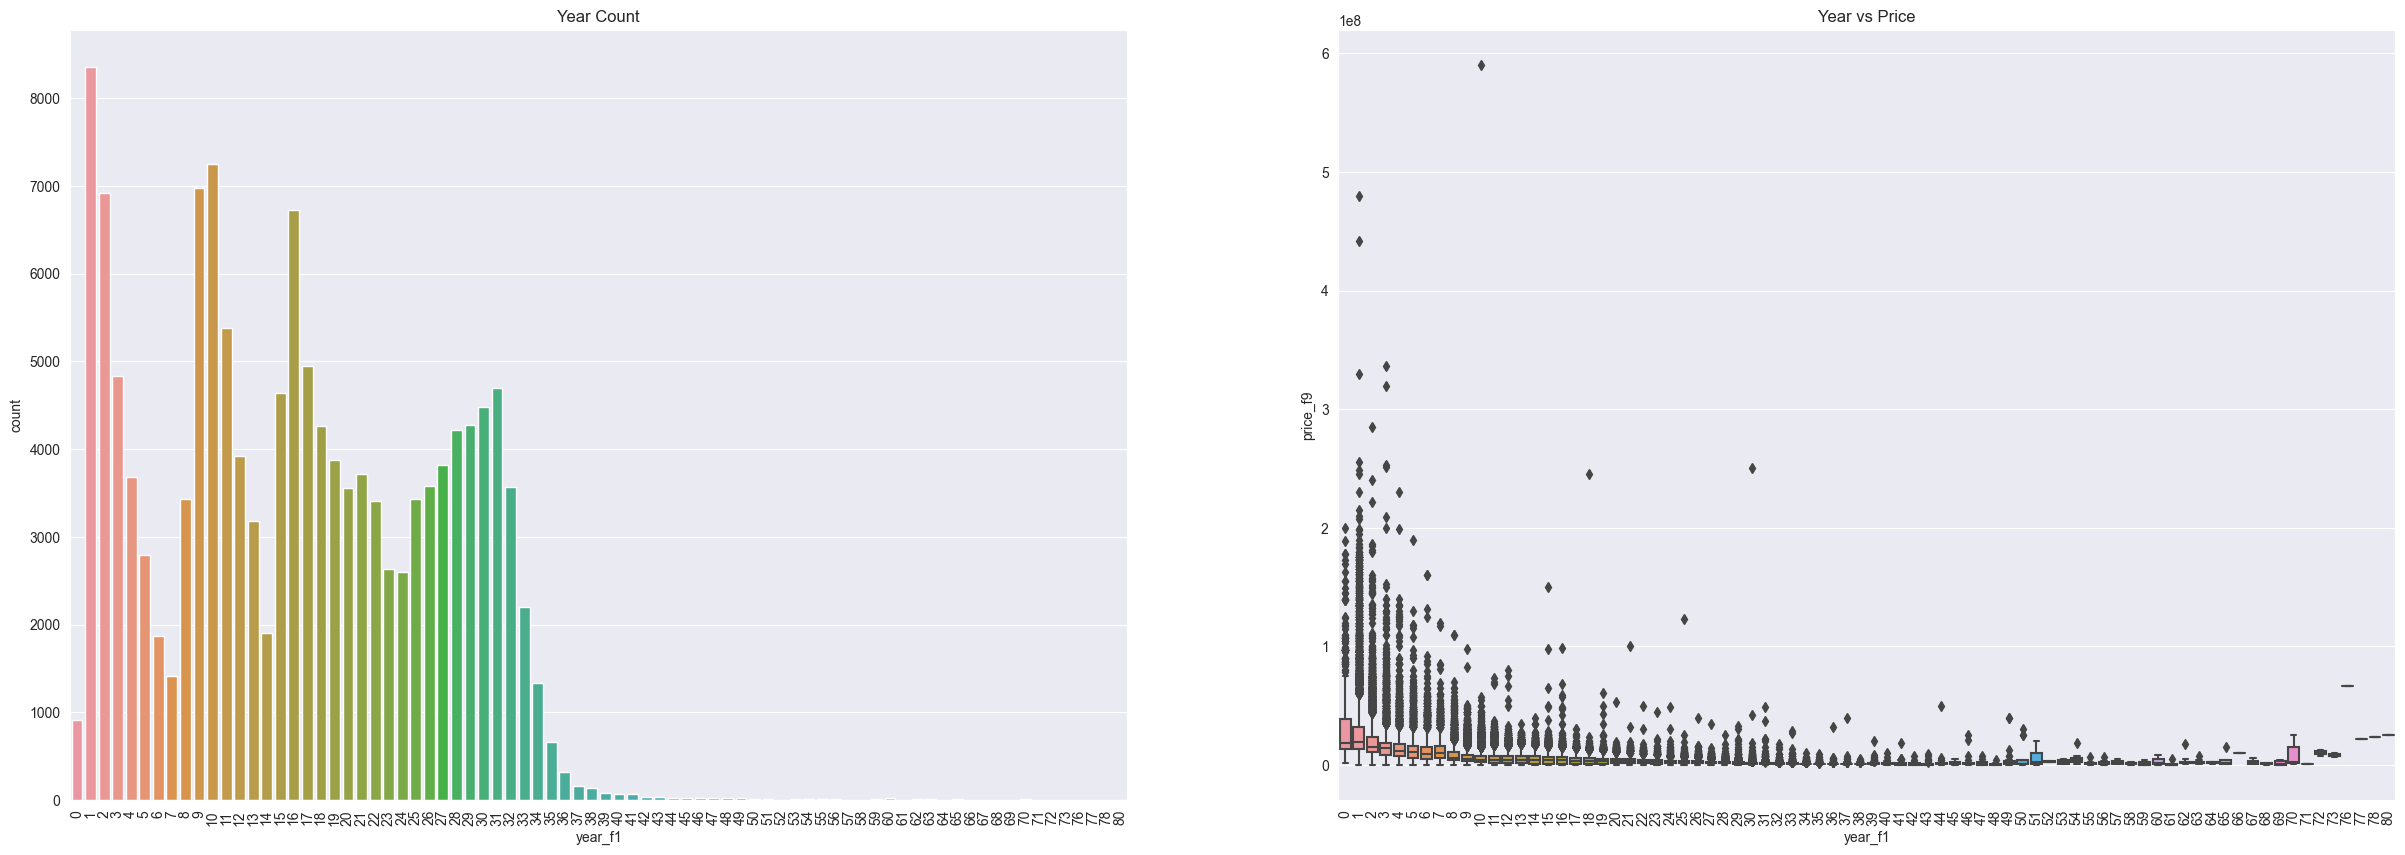

In [22]:
fig,axes = plt.subplots(1,2,figsize=(30,10))

# Year vs Price
sns.countplot(x=df_num.year_f1,ax=axes[0])
axes[0].set_title('Year Count')
axes[0].tick_params(axis='x',rotation=90)

sns.boxplot(x=df_num.year_f1,y=df_num.price_f9,ax=axes[1])
axes[1].set_title('Year vs Price')
axes[1].tick_params(axis='x',rotation=90)

1.   Most of the cars are between year 2013-2020. ????
2.   Also the cars with the highest price are the new ones. ???


**1.3 Visualizing Categorical Nominal Features**

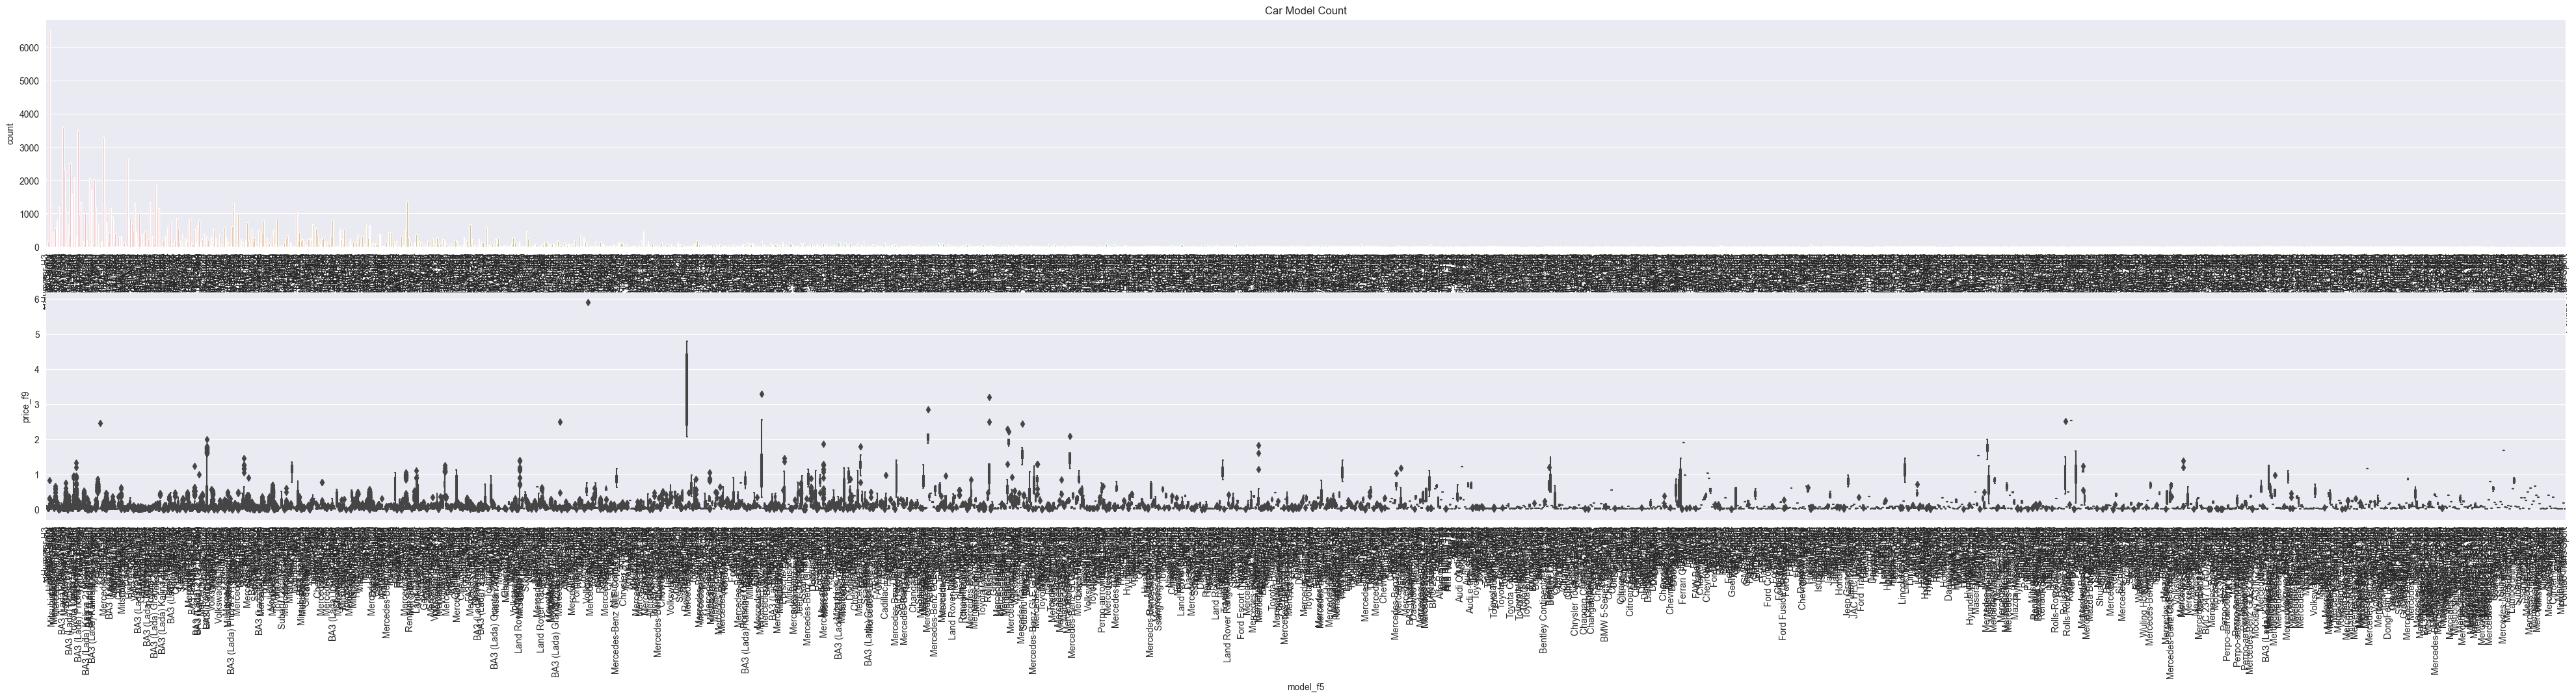

In [23]:
# Car Model vs Price
fig,axes = plt.subplots(2,1,figsize=(50,10))

sns.countplot(x=df_new.model_f5,ax=axes[0])
axes[0].set_title('Car Model Count')
axes[0].tick_params(axis='x',rotation=90)

sns.boxplot(x=df_new.model_f5,y=df_new.price_f9,ax=axes[1])
axes[1].set_title('Car Model Price')
axes[1].tick_params(axis='x',rotation=90)

1.   Most of the cars are:.
2.   Cars with the highest price are .
3.   The highest the price the lower the number of cars.


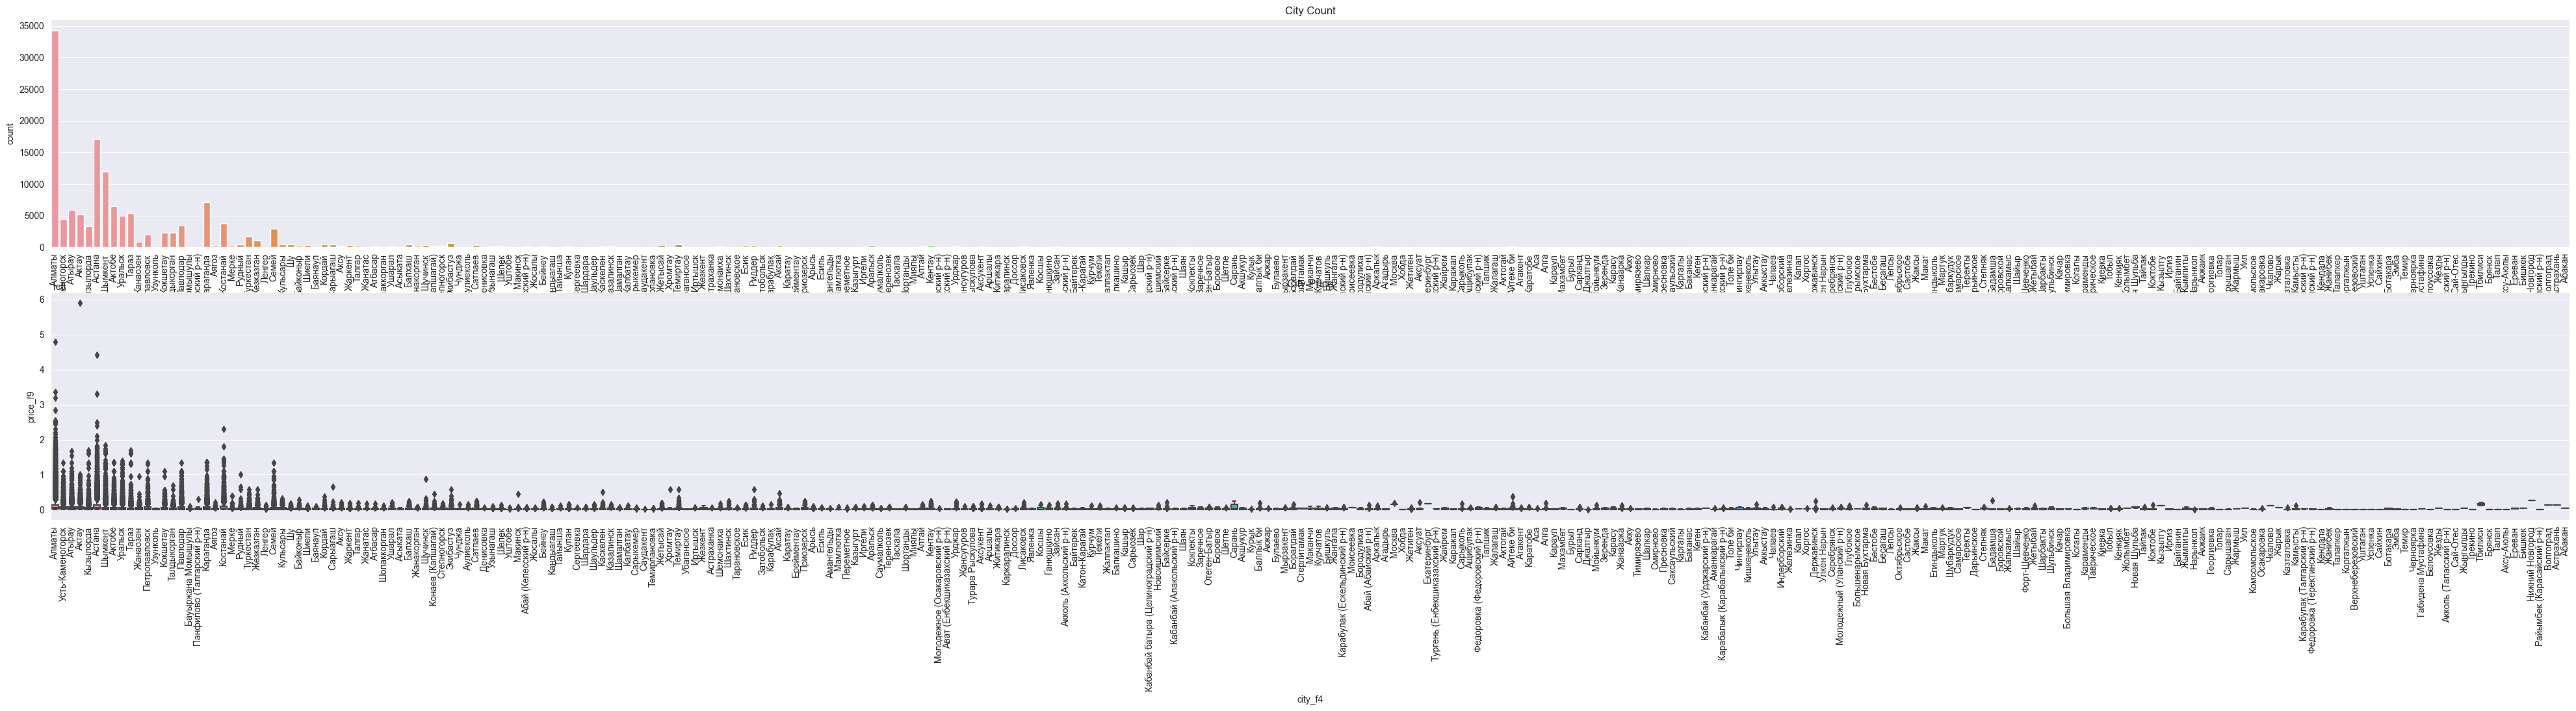

In [24]:
# City vs Price
fig,axes = plt.subplots(2,1,figsize=(50,10))

sns.countplot(x=df_new.city_f4,ax=axes[0])
axes[0].set_title('City Count')
axes[0].tick_params(axis='x',rotation=90)

sns.boxplot(x=df_new.city_f4,y=df_new.price_f9,ax=axes[1])
axes[1].set_title('City Price')
axes[1].tick_params(axis='x',rotation=90)

1.   Most cars are sold in cities - 
2.   

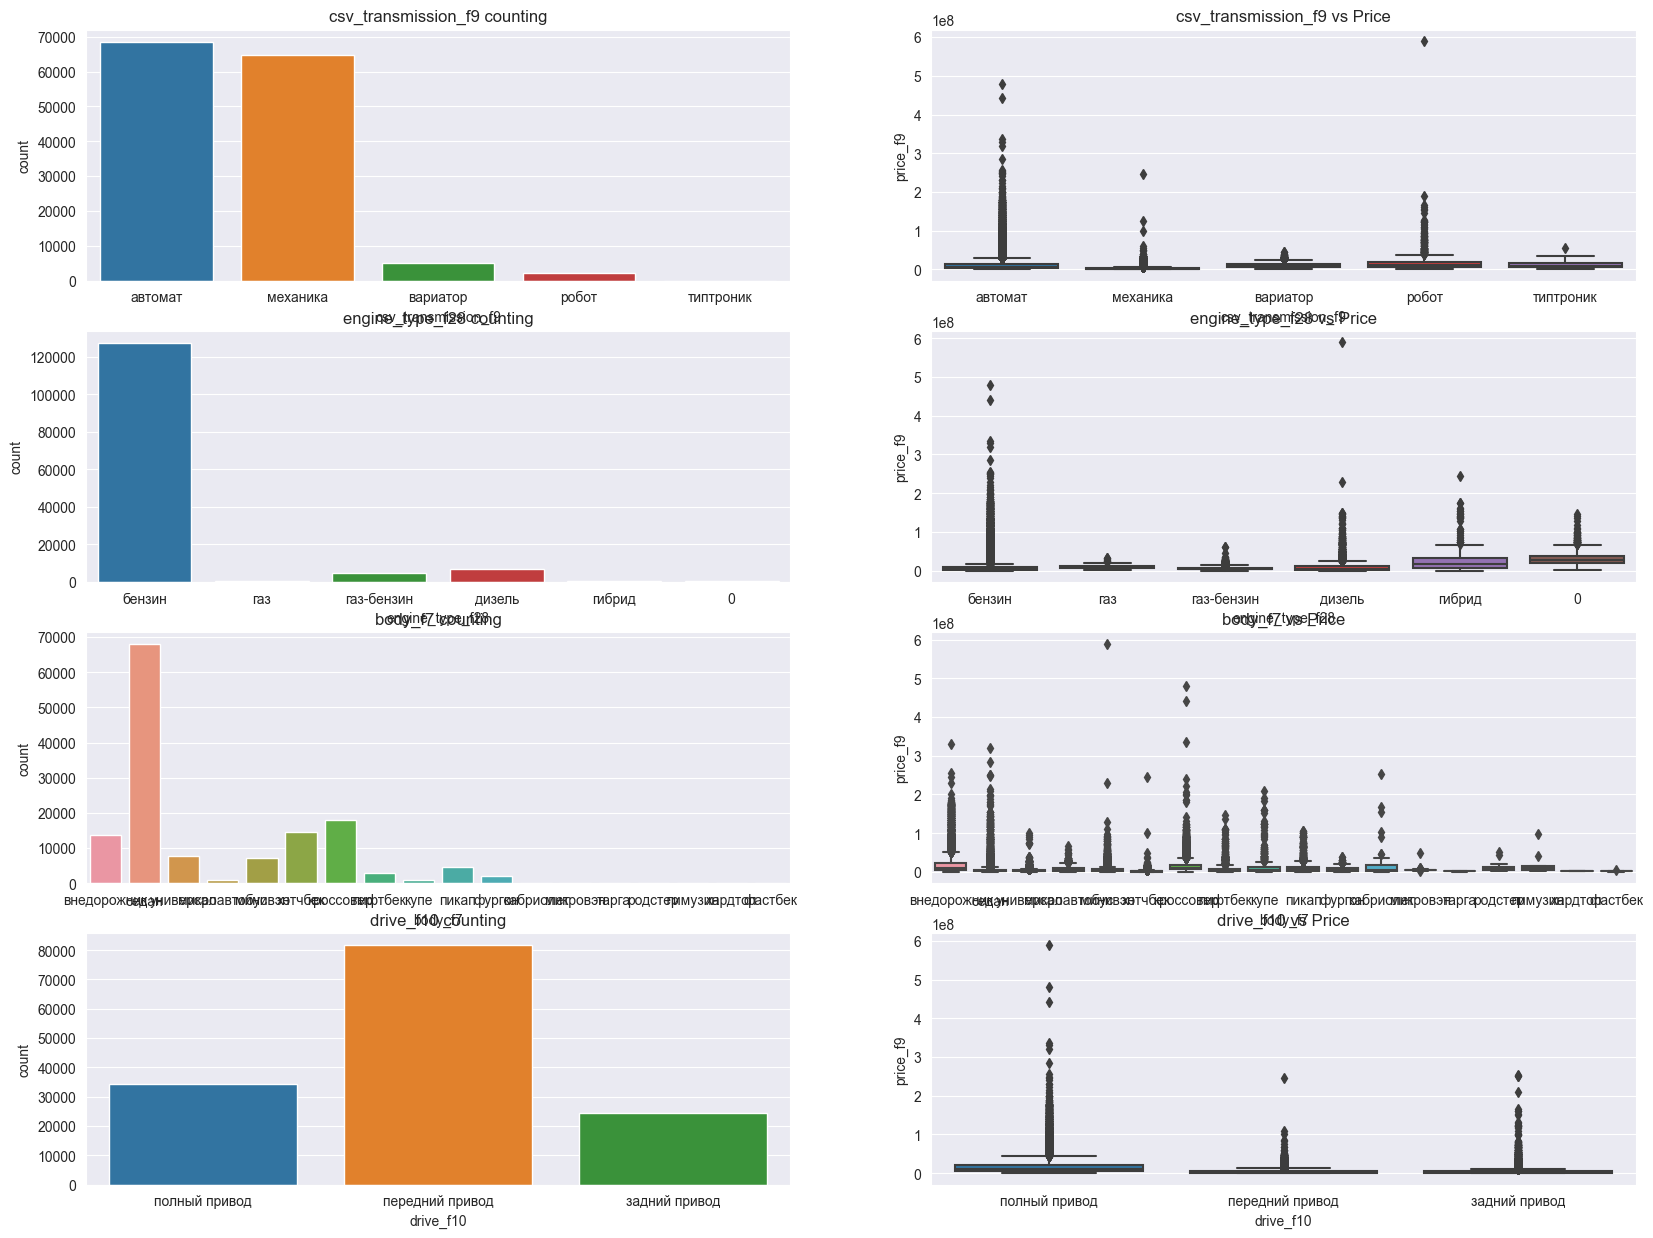

In [25]:
# Engine Type, Body, Transmission and Drive vs Price
def my_plot(x,y,nr):
    plt.subplot(4,2,nr)
    sns.countplot(x=df_new[x])
    plt.title(x+' counting')

    plt.subplot(4, 2, nr+1)
    sns.boxplot(x=df_new[x], y=df_new[y])
    plt.title(x + ' vs Price')


plt.figure(figsize=(20,15))
my_plot('csv_transmission_f9','price_f9',1)
my_plot('engine_type_f28','price_f9',3)
my_plot('body_f7','price_f9',5)
my_plot('drive_f10','price_f9',7)



1.   The most sold cars are those with automatic and manual transmission.
2.   Cars with the highest price are with Automatic transmissions.




---



1.   The most used fuel is petrol followed by diesel.
2.   Cars with Hybrid fueltype have the highest price.








In [26]:
df_num.head()

,id,year_f1,price_f9,run_f15,steer_left_f11,steer_right_f21,cleared_f13,not_cleared_f23,engine_volume_f8,options_f7,...,хамелеон,хамелеон металлик,черный,черный металлик,0,бензин,газ,газ-бензин,гибрид,дизель
0,148064435,18,8100000.0,169639.186752,1,0,1,0,3.5,24,...,0,0,0,1,0,1,0,0,0,0
1,148064495,29,1800000.0,169639.186752,0,1,1,0,1.5,14,...,0,0,0,0,0,1,0,0,0,0
2,148064274,19,5600000.0,230050.000000,1,0,1,0,3.0,23,...,0,0,0,1,0,1,0,0,0,0
3,148064644,19,1500000.0,300000.000000,1,0,0,1,1.6,5,...,0,0,0,0,0,1,0,0,0,0
4,148064646,23,3700000.0,169639.186752,1,0,1,0,3.0,12,...,0,0,0,0,0,1,0,0,0,0


**2.Outlier removal**

In [27]:
# ????????????????
# outlier_columns = ['price_f9', 'run_f15', 'engine_volume_f8', 'options_f7', 'visits_f8']
# for column in outlier_columns:
#    x = df_num[column].describe()
#    Q1 = x[4]
#    Q3 = x[6]
#    IQR = Q3-Q1
#    lower_bound = Q1-(1.5*IQR)
#    upper_bound = Q3+(1.5*IQR)
#    df = df[(df[column]>lower_bound)&(df[column]<upper_bound)]

In [28]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Columns: 2069 entries, id to дизель
dtypes: float64(4), int64(7), object(1), uint8(2057)
memory usage: 288.9+ MB


**3.Feature Engineering**

In [29]:
#Using (df) as a default name for our dataset.
# df = df2

In [30]:
# Id and av_prise_f17 were saved
df_id_serv = df_num[['id', 'av_prise_f17']]

In [32]:
df_id_serv.shape

(140700, 2)

In [33]:
# Scaling Data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

mms = MinMaxScaler()
# inputs = ['year_f1', 'price_f9', 'run_f15', 'engine_volume_f8', 'options_f7', 'visits_f8'] #av_prise_f17
inputs = ['year_f1', 'run_f15', 'engine_volume_f8', 'options_f7', 'visits_f8', 'av_prise_f17']
df_num[inputs] = mms.fit_transform(df_num[inputs])
df_num.head()

,id,year_f1,price_f9,run_f15,steer_left_f11,steer_right_f21,cleared_f13,not_cleared_f23,engine_volume_f8,options_f7,...,хамелеон,хамелеон металлик,черный,черный металлик,0,бензин,газ,газ-бензин,гибрид,дизель
0,148064435,0.2250,8100000.0,0.041990,1,0,1,0,0.382022,0.139394,...,0,0,0,1,0,1,0,0,0,0
1,148064495,0.3625,1800000.0,0.041990,0,1,1,0,0.157303,0.078788,...,0,0,0,0,0,1,0,0,0,0
2,148064274,0.2375,5600000.0,0.056943,1,0,1,0,0.325843,0.133333,...,0,0,0,1,0,1,0,0,0,0
3,148064644,0.2375,1500000.0,0.074257,1,0,0,1,0.168539,0.024242,...,0,0,0,0,0,1,0,0,0,0
4,148064646,0.2875,3700000.0,0.041990,1,0,1,0,0.325843,0.066667,...,0,0,0,0,0,1,0,0,0,0


In [34]:
# 
df_num['serv'] = df_id_serv.av_prise_f17

In [43]:
# Save num cleaned dataset

# num_df_name = 'num_KZ_last_id.csv'
# df_num.to_csv(root + '/datasets/' + num_df_name, index=False)

In [44]:
# Load num cleaned dataset

num_df_name = 'num_KZ_last_id.csv'
df_num = pd.read_csv(root + '/datasets/' + num_df_name)

In [35]:
df_num_1 = df_num

In [36]:
df_num = df_num_1

In [47]:
# Correlation coefficients to 'price_f9' calculating and sorting

# correlations_data = df_num.corr()['price_f9'].sort_values()


In [37]:
# correlations_data.to_csv(root + '/datasets/corr_new.csv', encoding='utf-8-sig')
# correlations_data.to_csv('corr_new.csv', encoding='utf-8-sig')

correlations_data = pd.read_csv('corr_new.csv',index_col=0, squeeze=True)
correlations_data

year_f1            -0.475518
механика           -0.356198
run_f15            -0.274990
передний привод    -0.262726
седан              -0.194881
                      ...   
автомат             0.321486
полный привод       0.398430
engine_volume_f8    0.404437
av_prise_f17        0.780270
price_f9            1.000000
Name: price_f9, Length: 2068, dtype: float64

<AxesSubplot: >

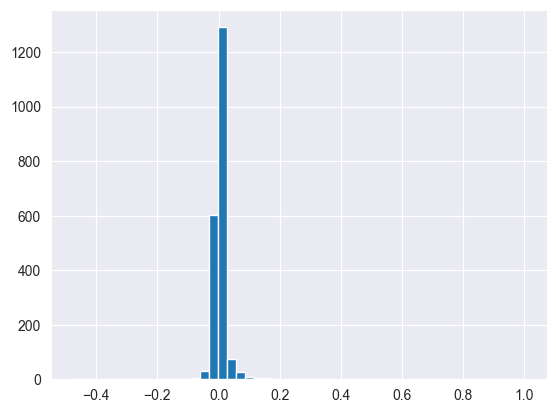

In [38]:
correlations_data.hist(
                  #  figsize=(9,6),   # Plot size
                   bins=50)         # Number of histogram bins

In [39]:
# Features which correlation coefficient > trashhold
trashhold = 0.05
corr_left =[[pos, correlations_data[pos]] for pos in correlations_data.index if np.abs(correlations_data[pos]) > trashhold]
for i in range(len(corr_left)): print(corr_left[i])

['year_f1', -0.4755179961002798]
['механика', -0.3561982643795818]
['run_f15', -0.2749897459547651]
['передний привод', -0.2627259639423474]
['седан', -0.194880509061646]
['хэтчбек', -0.1392562320706479]
['not_cleared_f23', -0.1228723151067965]
['задний привод', -0.1094918992272648]
['ВАЗ (Lada) 2114 (хэтчбек)', -0.0802475064479461]
['универсал', -0.0801126665275011]
['steer_right_f21', -0.0777195049512217]
['Volkswagen Passat', -0.070165673106371]
['серебристый металлик', -0.0669186561460677]
['Daewoo Nexia', -0.065664977362057]
['ВАЗ (Lada) 2115 (седан)', -0.0620385508762522]
['Volkswagen Golf', -0.0596908994209539]
['серебристый', -0.0585001624316914]
['ВАЗ (Lada) 2110 (седан)', -0.0583481333435677]
['ВАЗ (Lada) Priora 2170 (седан)', -0.0554845673025656]
['Opel Vectra', -0.053472730200201]
['зеленый металлик', -0.0533201126229091]
['бензин', -0.0519614985934839]
['ВАЗ (Lada) 2107', -0.0515330854701742]
['Rolls-Royce Phantom', 0.0514810957437489]
['visits_f8', 0.0519543585290784]
['H

In [40]:
# For calculation leave only features which correlation coefficient > trashhold
df_num_corr = pd.DataFrame(df_num, columns=[cor[0] for cor in corr_left])
print(df_num_corr.info())
# df_num_corr = df_num

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 83 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   year_f1                         140700 non-null  float64
 1   механика                        140700 non-null  uint8  
 2   run_f15                         140700 non-null  float64
 3   передний привод                 140700 non-null  uint8  
 4   седан                           140700 non-null  uint8  
 5   хэтчбек                         140700 non-null  uint8  
 6   not_cleared_f23                 140700 non-null  int64  
 7   задний привод                   140700 non-null  uint8  
 8   ВАЗ (Lada) 2114 (хэтчбек)       140700 non-null  uint8  
 9   универсал                       140700 non-null  uint8  
 10  steer_right_f21                 140700 non-null  int64  
 11  Volkswagen Passat               140700 non-null  uint8  
 12  серебристый мета

In [41]:
df_num_corr = df_num

**4.Building the model**

In [42]:
x = df_num_corr.drop('price_f9',axis=1)
y= df_num_corr.price_f9

In [43]:
#Splitting data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [44]:
x_train['id']

103352    148257018
120701    146700207
35261     148072616
97019     144835981
42739     148101796
            ...    
110268    147427903
119879    148222038
103694    148058994
131932    147529738
121958    129053994
Name: id, Length: 98490, dtype: object

In [45]:
x_train_id = x_train[['id', 'serv']]
x_test_id = x_test[['id', 'serv']]
x_train = x_train.drop(['id', 'serv'], axis=1)
x_test = x_test.drop(['id', 'serv'], axis=1)



*   Linear Regression
*   Random Forest Regressor
*   Decision Tree Regressor

















In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [48]:
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def model_train(x_train,y_train):
  all_models = ['LinearRegression()', 'RandomForestRegressor()', 'DecisionTreeRegressor()']
  scores = []
  for i in all_models:
    # model = i
    model = pickle.load(open(f'{i}_big.pkl','rb'))
    # model.fit(x_train,y_train)
    y_predicted = model.predict(x_train)
    mse = mean_squared_error(y_train,y_predicted)
    mae = mean_absolute_error(y_train,y_predicted)
    scores.append({
        'model': i,
        'best_score': model.score(x_train,y_train),
        'mean_squared_error': mse,
        'mean_absolute_error': mae
    })

  return scores
  # pd.DataFrame(scores,columns=['model','best_score','mean_squared_error','mean_absolute_error'])

scores = model_train(x_train,y_train)
print('Training is finished!')

Training is finished!


**Training Data**

In [58]:
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def model_train(x_train,y_train):
  # all_models = [LinearRegression(), RandomForestRegressor(), DecisionTreeRegressor()]
  all_models = [LinearRegression(), RandomForestRegressor(), DecisionTreeRegressor()]
  scores = []
  for i in all_models:
    model = i
    model.fit(x_train,y_train)
    y_predicted = model.predict(x_train)
    mse = mean_squared_error(y_train,y_predicted)
    mae = mean_absolute_error(y_train,y_predicted)
    scores.append({
        'model': i,
        'best_score': model.score(x_train,y_train),
        'mean_squared_error': mse,
        'mean_absolute_error': mae
    })
    filename = f'{i}_big.pkl'
    pickle.dump(i, open(filename, 'wb'))
  return scores
  # pd.DataFrame(scores,columns=['model','best_score','mean_squared_error','mean_absolute_error'])

scores = model_train(x_train,y_train)
print('Training is finished!')
# print(pd.DataFrame(scores,columns=['model','best_score','mean_squared_error','mean_absolute_error']))

Training is finished!


In [151]:
# import pickle

# model1 = LinearRegression()
# model2 - RandomForestRegressor()
# model3 = DecisionTreeRegressor()

# all_models = [LinearRegression(), RandomForestRegressor(), DecisionTreeRegressor()]
# for i in all_models:
#     filename = f'{i}.pkl'
#     pickle.dump(i, open(filename, 'wb'))

In [60]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(random_state=42)
model_xgb.fit(x_train,y_train)
y_predicted = model_xgb.predict(x_train)
mse = mean_squared_error(y_train,y_predicted)
mae = mean_absolute_error(y_train,y_predicted)
scores.append({
        'model': 'XGBRegressor',
        'best_score': model_xgb.score(x_train,y_train),
        'mean_squared_error': mse,
        'mean_absolute_error': mae
    })

# filename = f'xgboost_big.pkl'
# pickle.dump(model_xgb, open(filename, 'wb'))

In [61]:

import lightgbm as lgb 

model_lgb = lgb.LGBMRegressor(random_state=42)
model_lgb.fit(x_train,y_train)
y_predicted = model_lgb.predict(x_train)
mse = mean_squared_error(y_train,y_predicted)
mae = mean_absolute_error(y_train,y_predicted)
scores.append({
        'model': 'LightGBM Regressor',
        'best_score': model_lgb.score(x_train,y_train),
        'mean_squared_error': mse,
        'mean_absolute_error': mae
    })

# filename = f'light_gbm.pkl'
# pickle.dump(model_lgb, open(filename, 'wb'))

LightGBMError: Do not support special JSON characters in feature name.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
# Neural Network Using Tensorflow - Keras
## Sequential Model 

x_train_nn,x_val_nn,y_train_nn,y_val_nn = train_test_split(x_train,y_train,test_size=0.3,random_state=42)

input_dimension = x_train_nn.shape[1] # this represent number of features

### hyper parameters
epochs = 30
batch_size = 64
layer_nods = df_num_corr.shape[1]

### model_nn
model_nn = Sequential()
model_nn.add(Dense(layer_nods*2, input_shape=(input_dimension,), activation='relu', kernel_regularizer= tf.keras.regularizers.l1(0.001)))
model_nn.add(Dense(layer_nods, activation='relu'))
model_nn.add(Dense(1))
model_nn.compile(optimizer=tf.keras.optimizers.Adam(0.01),loss='mse',
              metrics=['mae'])
model_nn.summary()


In [ ]:
history = model_nn.fit(x_train, y_train.values, epochs=epochs, batch_size=batch_size,
          validation_data=(x_val_nn, y_val_nn.values))

In [ ]:
plt.plot( history.history['mae'], color='skyblue', linewidth=2, label='training mae')
plt.plot( history.history['val_mae'], color='green', linewidth=2, label='val mae')

plt.plot( history.history['loss'], color='skyblue', linewidth=2, linestyle='dashed', label="training loss")
plt.plot( history.history['val_loss'], color='green', linewidth=2, linestyle='dashed', label="val loss")
plt.legend()

In [49]:
y_predicted = model_nn.predict(x_train)
mse = mean_squared_error(y_train,y_predicted)
mae = mean_absolute_error(y_train,y_predicted)
scores.append({
        'model': 'Neural Network',
        'best_score': r2_score(y_train, y_predicted),
        'mean_squared_error':mse,
        'mean_absolute_error':mae
    })
print('Traing Table')
# print(pd.DataFrame(scores,columns=['model','best_score','mean_squared_error','mean_absolute_error']))
pd.DataFrame(scores,columns=['model','best_score','mean_squared_error','mean_absolute_error'])

NameError: name 'model_nn' is not defined

**Testing Data**

In [50]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
res_clmns = ['LR', 'RFR', 'DTR', 'XGB', 'LGBM', 'NN']
def model_test(x_test,y_test):
  all_models = [LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor()]
  scores = []
  
  test_results = pd.DataFrame()
  test_results['test_data'] = y_test
  for j, i in enumerate(all_models):
    model = i
    model.fit(x_test,y_test)
    y_predicted = model.predict(x_test)
    test_results[res_clmns[j]] = y_predicted
    mse = mean_squared_error(y_test,y_predicted)
    mae = mean_absolute_error(y_test,y_predicted)
    scores.append({
        'model': i,
        'best_score': model.score(x_test,y_test),
        'mean_squared_error': mse,
        'mean_absolute_error': mae
        })
  return scores, test_results


scores, test_results = model_test(x_test,y_test)
print('Testing is finished!')
# print(pd.DataFrame(scores,columns=['model','best_score','mean_squared_error','mean_absolute_error']))

Testing is finished!


In [ ]:
y_predicted = model_xgb.predict(x_test)
test_results['XGB'] = y_predicted
mse = mean_squared_error(y_test,y_predicted)
mae = mean_absolute_error(y_test,y_predicted)
scores.append({
        'model': 'XGBRegressor',
        'best_score': model_xgb.score(x_test,y_test),
        'mean_squared_error':mse,
        'mean_absolute_error':mae
    })

y_predicted = model_lgb.predict(x_test)
test_results['LGBM'] = y_predicted
mse = mean_squared_error(y_test,y_predicted)
mae = mean_absolute_error(y_test,y_predicted)
scores.append({
        'model': 'LightGBM Regressor',
        'best_score': model_lgb.score(x_test,y_test),
        'mean_squared_error':mse,
        'mean_absolute_error':mae
    })

y_predicted = model_nn.predict(x_test)
test_results['NN'] = y_predicted
mse = mean_squared_error(y_test,y_predicted)
mae = mean_absolute_error(y_test,y_predicted)
scores.append({
        'model': 'Neural Network',
        'best_score': r2_score(y_test, y_predicted),
        'mean_squared_error':mse,
        'mean_absolute_error':mae
    })
print('Test Table')
# print(pd.DataFrame(scores,columns=['model','best_score','mean_squared_error','mean_absolute_error']))
pd.DataFrame(scores,columns=['model','best_score','mean_squared_error','mean_absolute_error'])

In [64]:
res_clmns = ['LR', 'RFR', 'DTR']
pd.DataFrame(scores,columns=['model','best_score','mean_squared_error','mean_absolute_error'])

,model,best_score,mean_squared_error,mean_absolute_error
0,LinearRegression(),0.851296,2.682154e+13,2.229636e+06
1,"(DecisionTreeRegressor(max_features=1.0, rando...",0.987193,2.310002e+12,4.086921e+05
2,DecisionTreeRegressor(),0.999993,1.251133e+09,1.003947e+03


Text(0, 0.5, 'Predicted')

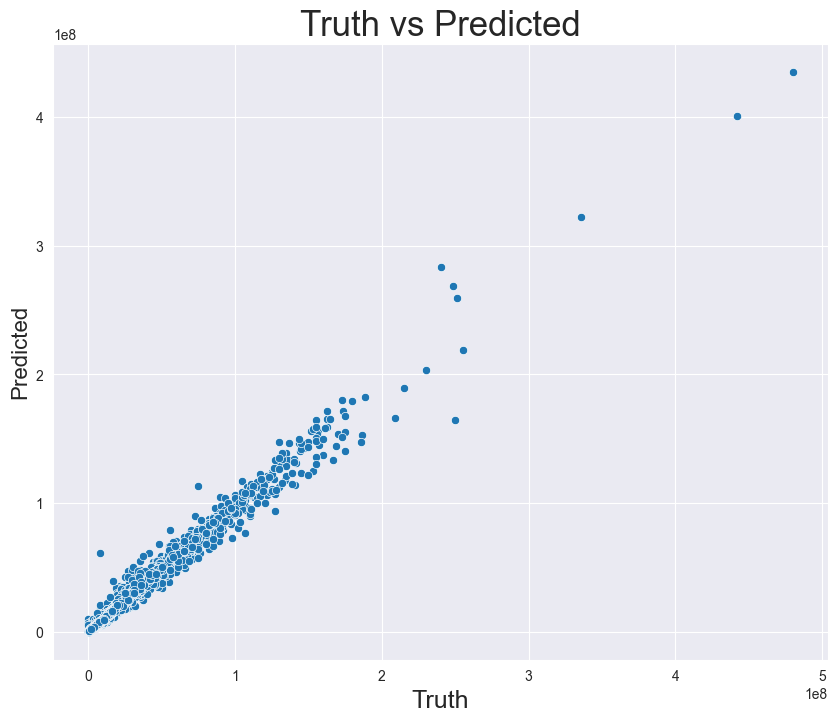

In [53]:
from sklearn.tree import DecisionTreeRegressor
model = RandomForestRegressor()
# model.fit(x_test,y_test)

# filename = f'RandomForestRegressor()_big_Xtest.pkl'
# pickle.dump(model, open(filename, 'wb'))

model = pickle.load(open('RandomForestRegressor()_big_Xtest.pkl','rb'))
y_predicted = model.predict(x_test)

plt.figure(figsize=(10,8))
plt.title('Truth vs Predicted',fontsize=25)
sns.scatterplot(x = y_test,y = y_predicted)
plt.xlabel('Truth', fontsize=18)
plt.ylabel('Predicted', fontsize=16)

In [52]:
y_predicted

array([4391500.  , 3152800.  , 2456988.69, ..., 3893500.  ,  591999.37,
       1967000.  ])

In [70]:
for mod in res_clmns:
    test_results[mod + '_error, %'] = (test_results['test_data'] - test_results[mod]) / test_results['test_data'] * 100 
test_results = test_results.sort_values(['DTR_error, %'])

test_results.head(20) 

,test_data,LR,RFR,DTR,"LR_error, %","RFR_error, %","DTR_error, %"
82788,12323000.0,15638528.0,1.330311e+07,1.321200e+07,-26.905202,-7.953488,-7.214152
72221,12825000.0,15429632.0,1.361488e+07,1.371400e+07,-20.309021,-6.158877,-6.931774
32892,14200200.0,14995456.0,1.499463e+07,1.497016e+07,-5.600315,-5.594527,-5.422177
82752,12068000.0,14974976.0,1.278147e+07,1.272050e+07,-24.088300,-5.912063,-5.406861
96442,12323000.0,15728640.0,1.298711e+07,1.297550e+07,-27.636452,-5.389211,-5.294977
98305,12209000.0,15187968.0,1.282553e+07,1.285033e+07,-24.399771,-5.049840,-5.252955
79851,12209000.0,14385152.0,1.282238e+07,1.279100e+07,-17.824163,-5.024004,-4.766975
96466,12966000.0,15216640.0,1.353824e+07,1.350000e+07,-17.358013,-4.413357,-4.118464
72958,12068000.0,15273984.0,1.255451e+07,1.251850e+07,-26.565993,-4.031372,-3.733013
89545,12068000.0,14999552.0,1.256631e+07,1.251850e+07,-24.291946,-4.129211,-3.733013


In [69]:
test_results.tail(20) 

,test_data,LR,RFR,DTR,"LR_error, %","RFR_error, %","DTR_error, %"
51947,12620000.0,11866112.0,1.237156e+07,1.235500e+07,5.973756,1.968608,2.099842
75037,15972000.0,10289152.0,1.563575e+07,1.558900e+07,35.580065,2.105263,2.397946
69791,14603000.0,15159296.0,1.417243e+07,1.418400e+07,-3.809464,2.948485,2.869273
46290,14603000.0,15060992.0,1.412443e+07,1.418400e+07,-3.136287,3.277218,2.869273
66808,13765000.0,14561280.0,1.345604e+07,1.336550e+07,-5.784817,2.244551,2.902288
55659,15972000.0,9506816.0,1.547468e+07,1.546233e+07,40.478237,3.113669,3.191001
85144,15017000.0,15364096.0,1.437837e+07,1.452550e+07,-2.311354,4.252744,3.272957
76380,13950000.0,14938112.0,1.347541e+07,1.348900e+07,-7.083240,3.402108,3.304659
40118,126240000.0,103862272.0,1.185369e+08,1.219200e+08,17.726337,6.101949,3.422053
76276,12969000.0,15024128.0,1.270170e+07,1.251850e+07,-15.846465,2.061081,3.473668


**5.Conclusion**

*   The model which has performed better is Decision Tree Rregressor
*   The model has performed well in training and testing data




In [54]:
car_model = 'Toyota Land Cruiser'
df_model = pd.concat([x_train_id, x_train], axis=1)

df_model = df_model[x_train[car_model]==1]
df_model = df_model[['id', 'year_f1', 'run_f15', 'engine_volume_f8', 'serv']]
# y_train = y_train[~y_train.index.duplicated()]
df_model['predicted price'] = y_predicted
print(df_model.head(20))

ValueError: Length of values (42210) does not match length of index (1079)

In [165]:
# y_train.shape
df_model = pd.concat([x_train_id, x_train], axis=1)
df_model = df_model[['id', 'year_f1', 'run_f15', 'engine_volume_f8', 'serv']]
df_model['predicted price'] = y_train
df_model.head(10)

,id,year_f1,run_f15,engine_volume_f8,serv,predicted price
90348,148257018,0.1625,0.038861,0.157303,1387436.0,2000000.0
107697,146700207,0.1000,0.022525,0.213483,8714285.0,8000000.0
22257,148072616,0.3000,0.085396,0.325843,3718666.0,3600000.0
84015,144835981,0.2500,0.056435,0.168539,3120914.0,2700000.0
29735,148101796,0.0250,0.041990,0.157303,5865451.0,5999999.0
54670,146375036,0.2250,0.071039,0.382022,4035309.0,4500000.0
68849,147799372,0.2750,0.047029,0.314607,2535714.0,2800000.0
28651,135071623,0.0875,0.024752,0.213483,14336229.0,13000000.0
56299,147416185,0.1875,0.039604,0.168539,4539285.0,4480000.0
95041,117680805,0.2250,0.043317,0.269663,3081702.0,2455000.0


In [214]:
import seaborn as sns
df_model = pd.concat([x_train_id, x_train], axis=1)
df_model = df_model[x_train[car_model]==1]
df_model = df_model[['id', 'year_f1', 'run_f15', 'engine_volume_f8', 'serv']]
df_model['predicted price'] = y_test
df_cov=df_model[['id', 'serv','predicted price']]
df_cov = df_cov[df_cov['serv']!=0]

df_cov.describe()
# df_cov[['serv','predicted price']].plot.box()
# sns.boxplot(y='predicted price', data = df_cov)
# df_cov

,serv,predicted price
count,9.930000e+02,4.550000e+02
mean,2.917705e+07,1.135892e+07
std,2.016901e+07,1.581927e+07
min,4.172222e+06,1.000000e+04
25%,1.324664e+07,2.700000e+06
50%,2.342184e+07,5.700000e+06
75%,4.127130e+07,1.479500e+07
max,7.268697e+07,1.560000e+08


In [219]:
df_cov['diff'] = df_cov['predicted price']/df_cov['serv']-1
df_cov
# sns.boxplot(y='serv', data = df_cov)

,id,serv,predicted price,diff
15149,147998999,13246639.0,10700000.0,-0.192248
5977,148036792,11745860.0,115000000.0,8.790684
9470,147453682,41161460.0,2945000.0,-0.928452
5019,148085233,17331062.0,2800000.0,-0.838440
2071,147533852,25230267.0,9190000.0,-0.635755
...,...,...,...,...
31024,145156517,21748387.0,NaN,NaN
9592,137719843,13035000.0,NaN,NaN
9494,148140684,28305492.0,7800000.0,-0.724435
2869,120197228,17222857.0,NaN,NaN


In [233]:
df_new.head(10)

,id,model_f5,city_f4,body_f7,csv_transmission_f9,drive_f10,paint_f12,year_f1,price_f9,run_f15,steer_left_f11,steer_right_f21,cleared_f13,not_cleared_f23,engine_volume_f8,engine_type_f28,options_f7,visits_f8,av_prise_f17
0,148064435,Hummer H3,Алматы,внедорожник,автомат,полный привод,черный металлик,18,8100000.0,NaN,1,0,1,0,3.5,бензин,24,64,8312500.0
1,148064495,Nissan Sunny,Усть-Каменогорск,седан,автомат,передний привод,серебристый,29,1800000.0,NaN,0,1,1,0,1.5,бензин,14,34,NaN
2,148064274,Toyota Camry,Алматы,седан,автомат,передний привод,черный металлик,19,5600000.0,230050.0,1,0,1,0,3.0,бензин,23,129,6251289.0
3,148064644,Hyundai Elantra,Атырау,седан,механика,передний привод,NaN,19,1500000.0,300000.0,1,0,0,1,1.6,бензин,5,88,1807272.0
4,148064646,Mitsubishi Montero Sport,Актау,внедорожник,автомат,полный привод,белый металлик,23,3700000.0,NaN,1,0,1,0,3.0,бензин,12,126,4371530.0
5,148064603,Mitsubishi Sigma,Алматы,универсал,механика,передний привод,серебристый металлик,29,700000.0,300000.0,1,0,1,0,3.0,бензин,7,124,1167500.0
6,147291699,Mercedes-Benz Sprinter,Кызылорда,микроавтобус,механика,задний привод,белый металлик,20,6500000.0,NaN,1,0,1,0,3.2,газ,20,45,NaN
7,148064582,Toyota Camry,Алматы,седан,механика,передний привод,NaN,31,1600000.0,NaN,1,0,1,0,2.2,бензин,1,42,1996813.0
8,148064681,Mercedes-Benz E 320,Астана,седан,автомат,задний привод,синий металлик,22,250000.0,NaN,1,0,0,1,3.2,бензин,1,708,4426944.0
9,148064576,Kia Rio,Астана,седан,автомат,передний привод,серый,10,5900000.0,160000.0,1,0,1,0,1.6,бензин,11,42,5499077.0


In [236]:
df_num[df_num['id'] == '146912762']

,id,year_f1,price_f9,run_f15,steer_left_f11,steer_right_f21,cleared_f13,not_cleared_f23,engine_volume_f8,options_f7,...,хамелеон металлик,черный,черный металлик,0,бензин,газ,газ-бензин,гибрид,дизель,serv
7492,146912762,0.0125,67200000.0,0.000247,1,0,1,0,0.382022,0.012121,...,0,0,0,0,1,0,0,0,0,72160240.0


In [141]:
# THERE ARE DUPLICATES IN y_test AND df_mdoel_pr

# df_model_pr = df_model_pr[~df_model_pr.index.duplicated()]
y_test = y_test[~y_test.index.duplicated()]
# df_model_pr
# df_model_pr.shape

In [62]:
df_model_pr = pd.concat([x_test_id, x_test], axis=1)
# # df_model_pr = df_model_pr[~df_model_pr.index.duplicated()]
#
# df_model_pr = df_model_pr[df_model_pr[car_model]==1]
# df_model_pr = df_model_pr[['id', 'year_f1', 'run_f15', 'engine_volume_f8', 'serv']]
df_model_pr['predicted price'] = y_predicted

print(df_model_pr.head(20))

               id        serv  year_f1   run_f15  steer_left_f11  \
18347   144744769   4375000.0   0.2500  0.080693               1   
96193   147895104   3764081.0   0.1125  0.129950               1   
100005  148277379   1919536.0   0.3500  0.041990               1   
39890   148260757         0.0   0.0250  0.004950               1   
98243   145148703   2396969.0   0.2750  0.056930               1   
88194   146320895   5142857.0   0.3000  0.098020               1   
102244  147095195         0.0   0.4375  0.041990               1   
8022    145731829  16564034.0   0.1250  0.034369               1   
120266  148357509   2432925.0   0.3375  0.074257               1   
139323  121421254         0.0   0.0750  0.012376               1   
57762   144572162   9494446.0   0.1250  0.032673               1   
40234   143118493   1143478.0   0.2250  0.041990               1   
124335  147572928         0.0   0.0125  0.002475               1   
5264    146579293         0.0   0.1500  0.055198

In [70]:
# df_model_pr = df_model_pr[df_model_pr[car_model]==1]
df_model_pr = df_model_pr[['id', 'year_f1', 'run_f15', 'engine_volume_f8', 'serv','predicted price']]
df_model_pr

,id,year_f1,run_f15,engine_volume_f8,serv,predicted price
4007,147414991,0.1375,0.070049,0.505618,24181363.0,26184000.0
32807,146846802,0.1250,0.037128,0.438202,24113838.0,24940900.0
124189,147251199,0.1000,0.055198,0.505618,33968358.0,33136000.0
139648,146890426,0.1000,0.048267,0.494382,21850892.0,18900800.0
29279,147084966,0.1125,0.037128,0.505618,26859865.0,26628000.0
...,...,...,...,...,...,...
35772,145116788,0.2000,0.077227,0.516854,13246639.0,13818000.0
47134,147348609,0.1250,0.030266,0.438202,24113838.0,25809400.0
20657,131430346,0.1625,0.055445,0.516854,19224109.0,20213000.0
26298,147594272,0.0750,0.011138,0.505618,41478024.0,45086000.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ValueError: Automatic legend placement (loc='best') not implemented for figure legend

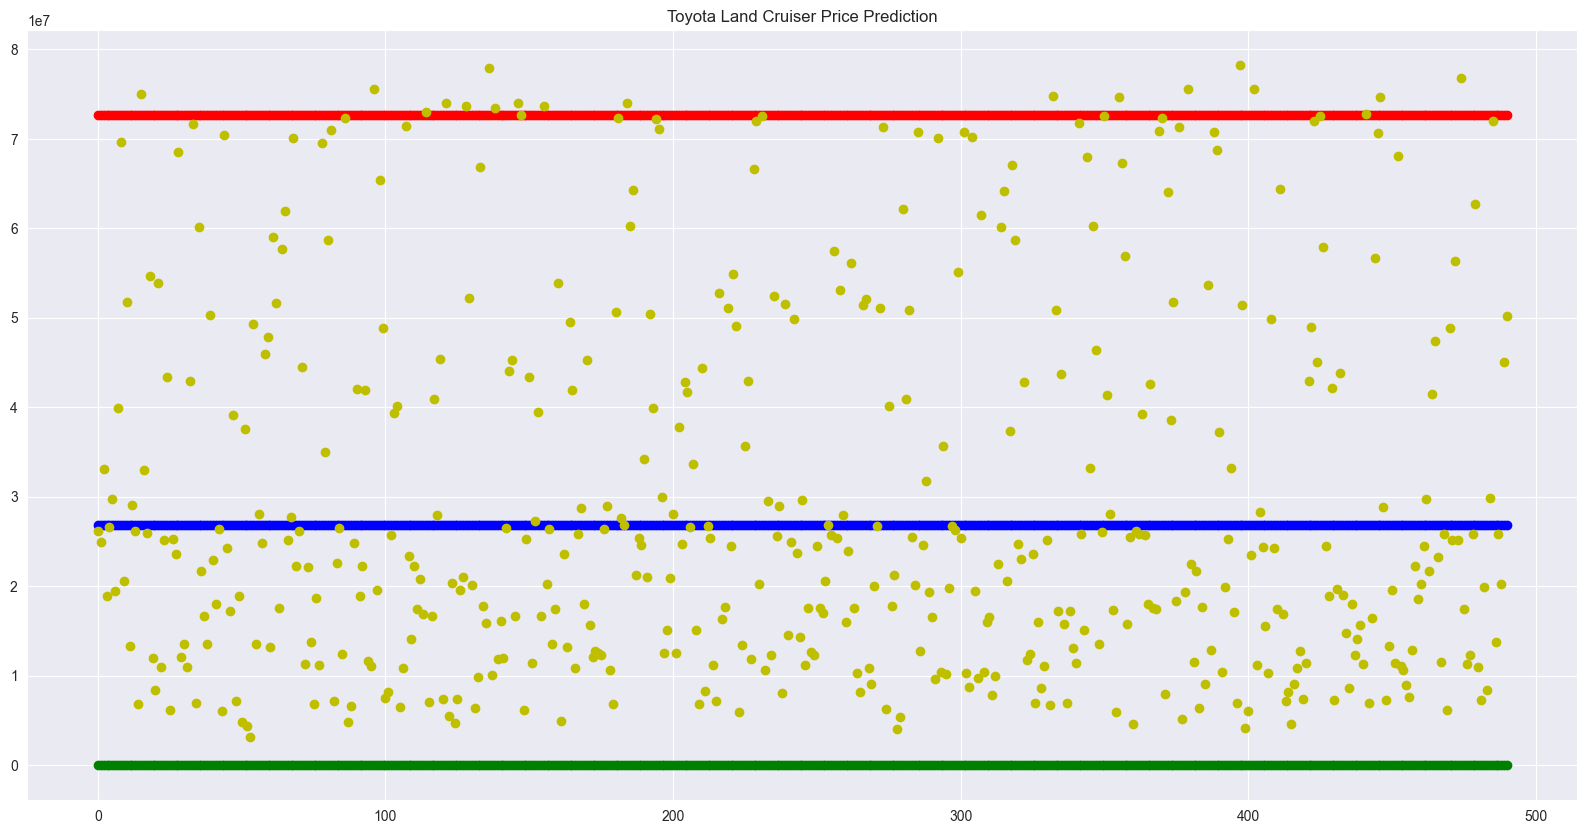

In [66]:
df_model_pr['mean_price'] = df_model['serv'].mean()
df_model_pr['min_price'] = df_model['serv'].min()
df_model_pr['max_price'] = df_model['serv'].max()
# print(df_model_pr.head(20))
df_model_pr.sort_values(['predicted price'])#.reset_index()
df_model_pr['ind'] = [i for i in range(df_model_pr.shape[0])]

# df_model_pr.plot(x='ind', y=['mean_price', 'min_price', 'max_price', 'price_f9'])
# df_model_pr.plot(x='ind', y=['price_f9'], kind='scatter')
# plt.figure(figsize=(20,10))
# plt.subplot(1,3,1)
# sns.jointplot()
# sns.lineplot(x='ind', y=['mean_price', 'min_price', 'max_price'])
# sns.scatterplot(x=df_num.year_f1,y=df_num.price_f9)
color = ['b', 'g', 'r', 'y']
# rgb = np.random.rand(1892, 3)
fig, ax = plt.subplots()
ax.set_title(car_model + ' Price Prediction')     #  заголовок для Axes

fig.set_figwidth(20)     #  ширина и
fig.set_figheight(10)    #  высота "Figure"
# ax.legend(handles=(),
    # labels=('mean_price', 'min_price', 'max_price', 'price_f9'), loc='best')
for i, cln in enumerate(['mean_price', 'min_price', 'max_price', 'predicted price']):
    ax.scatter(df_model_pr['ind'], df_model_pr[cln], c=color[i])#, s = 10, c = rgb, alpha = 0.75)  
fig.legend(loc = 'best')
plt.show()
# ax.scatter(df_model_pr[['ind', 'ind', 'ind', 'ind']], df_model_pr[['mean_price', 'min_price', 'max_price', 'price_f9']])#, s = 10, c = rgb, alpha = 0.75)

In [72]:
df_model_pr['diff'] = df_model_pr['serv']/df_model_pr['predicted price']-1
df_model_pr = df_model_pr.sort_values(by=['diff'], ascending=False)
df_model_pr

,id,year_f1,run_f15,engine_volume_f8,serv,predicted price,diff
820,148067038,0.2875,0.123762,0.494382,7751691.0,5186777.77,0.494510
127394,147619961,0.2000,0.041990,0.494382,15281818.0,10943000.00,0.396493
134241,147379278,0.2625,0.123762,0.516854,8072454.0,6134000.00,0.316018
18967,146421058,0.2750,0.074257,0.460674,6276923.0,4811500.00,0.304567
8218,148186980,0.1500,0.046782,0.505618,20383333.0,15645500.00,0.302824
...,...,...,...,...,...,...,...
22136,147955659,0.3250,0.041990,0.460674,0.0,4675000.00,-1.000000
21254,148024099,0.3000,0.041990,0.516854,0.0,5456777.77,-1.000000
19764,145685058,0.2000,0.041092,0.494382,0.0,10643800.00,-1.000000
24792,148088406,0.1500,0.044554,0.471910,0.0,22240300.00,-1.000000


<AxesSubplot: title={'center': 'Toyota LCruiser Predicted vs Service'}, xlabel='ind'>

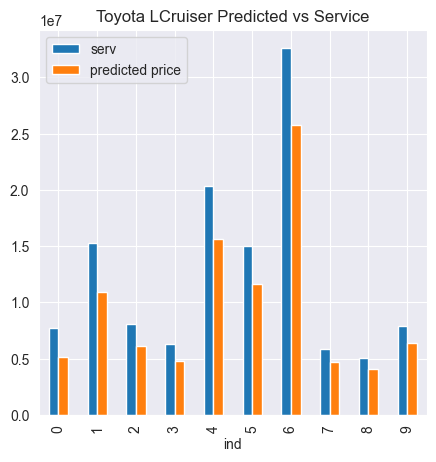

In [77]:
fig, ax = plt.subplots(figsize=(5,5))
start = 0
end = 10
ind_gr = [i for i in range(start, end)]

df_graph = df_model_pr[['serv', 'predicted price']].iloc[start : end]
df_graph['ind'] = ind_gr
df_graph.plot.bar(x = 'ind', y = ['serv', 'predicted price'], ax = ax, title='Toyota LCruiser Predicted vs Service')
# df_graph.set_index('ind').plot.bar()

In [84]:
dft=df_model_pr[['predicted price','serv']]
dft[['predicted price','serv']].describe()

print(dft.describe().to_latex(
    caption = 'Results',
    label = 'tab:results',
    # escape = False,
    column_format= '|c|c|c|c|c')
    )

\begin{table}
\centering
\caption{Results}
\label{tab:results}
\begin{tabular}{|c|c|c|c|c}
\toprule
{} &  predicted price &          serv \\
\midrule
count &     4.910000e+02 &  4.910000e+02 \\
mean  &     2.988583e+07 &  2.815283e+07 \\
std   &     2.099479e+07 &  2.181681e+07 \\
min   &     3.213025e+06 &  0.000000e+00 \\
25\%   &     1.281410e+07 &  1.174239e+07 \\
50\%   &     2.364000e+07 &  2.183485e+07 \\
75\%   &     4.395557e+07 &  4.147802e+07 \\
max   &     7.822571e+07 &  7.269889e+07 \\
\bottomrule
\end{tabular}
\end{table}

